In [1]:
from skymap import io, Calibrator, plot_utils
import numpy as np 
import matplotlib.pyplot as plt
import h5py
from pathlib import Path
from astropy.io import fits
import astropy.units as u


In [2]:


datadir : Path = "/Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01"

pointing_file = datadir + "/Antenna/2026_01_16_18:10:21.fits"

print(pointing_file)




/Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01/Antenna/2026_01_16_18:10:21.fits


In [3]:
hdul = fits.open(pointing_file)



In [4]:
hdul.info()

Filename: /Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01/Antenna/2026_01_16_18:10:21.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     118   ()      
  1  BEAM_OFFSETS    1 BinTableHDU     24   2R x 5C   [32A, 1D, 1D, 1J, 1J]   
  2  ANTPOSGR      1 BinTableHDU     57   451R x 16C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
  3  DYN_POINT     1 BinTableHDU     21   1R x 4C   [1D, 1D, 1D, 1D]   
  4  DYN_FOCUS     1 BinTableHDU     15   1R x 2C   [1D, 1D]   


In [5]:
pointing_file = datadir + "/ANTENNA/2026_01_16_18:10:21.fits"
hdul = fits.open(pointing_file)
hdul.info()

Filename: /Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01/ANTENNA/2026_01_16_18:10:21.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     118   ()      
  1  BEAM_OFFSETS    1 BinTableHDU     24   2R x 5C   [32A, 1D, 1D, 1J, 1J]   
  2  ANTPOSGR      1 BinTableHDU     57   451R x 16C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
  3  DYN_POINT     1 BinTableHDU     21   1R x 4C   [1D, 1D, 1D, 1D]   
  4  DYN_FOCUS     1 BinTableHDU     15   1R x 2C   [1D, 1D]   


In [6]:
hdul['ANTPOSGR'].data

FITS_rec([(61056.7571875 , 258.86886548, -5.25461581, 238.13512346, 26.57871253, 0.03113405, 258.86886548, -5.25461581, 238.13955677, 26.57350141, -85.0780797 , 287.1589983 , 35.1064842 , -0.00064068, 0.00186927, -0.00224577),
          (61056.75718866, 258.88110414, -5.24179511, 238.13495716, 26.59609324, 0.03111065, 258.88110414, -5.24179511, 238.13957084, 26.59097124, -85.0780797 , 287.1589983 , 35.1064842 , -0.00064068, 0.00186927, -0.00224577),
          (61056.75718981, 258.8931443 , -5.22903507, 238.13490888, 26.61329693, 0.03108752, 258.8931443 , -5.22903507, 238.13958458, 26.60844111, -85.0780797 , 287.1589983 , 35.1064842 , -0.00064068, 0.00186927, -0.00224577),
          (61056.75719097, 258.90533612, -5.21603531, 238.13491425, 26.63077957, 0.03106405, 258.90533612, -5.21603531, 238.13959802, 26.625911  , -85.07796464, 287.15882874, 35.09354591, -0.00064068, 0.00186927, -0.00224578),
          (61056.75719213, 258.91755992, -5.20300666, 238.13491425, 26.64830512, 0.03104054,

In [8]:
io.get_pointing_data(datadir, datetime(2026, 1, 16), 21)

AttributeError: module 'skymap.io' has no attribute 'get_pointing_data'

In [7]:
spec_cal = Calibrator.lab_cal(obs_data, cal_data)

NameError: name 'obs_data' is not defined

In [ ]:
beam_slice = slice(60000,None)
beam_obs = io.get_slice_from_time(spec_cal, beam_slice)

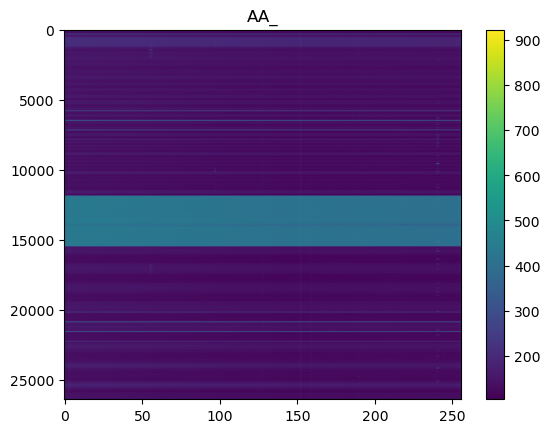

In [ ]:
plt.imshow(np.abs(beam_obs.calibrated_spec.AA_).value, aspect='auto')
plt.colorbar()
plt.title("AA_")
plt.show()

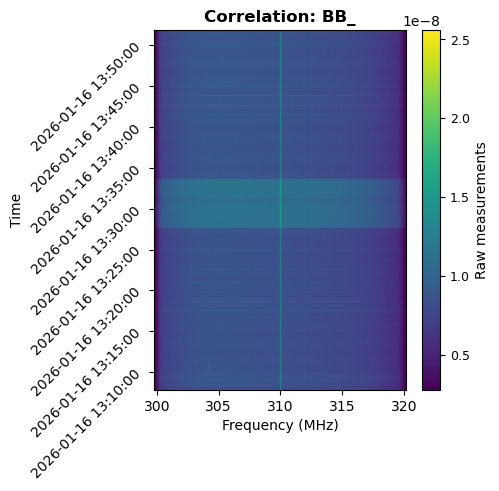

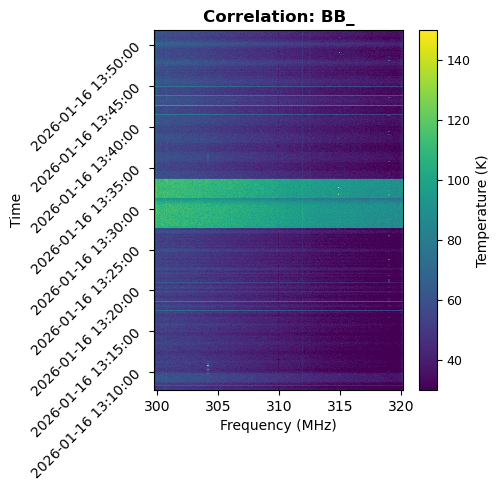

In [ ]:
plot_utils.plot_waterwall(beam_obs, data_type="magnitude", attribute="BB_");
plot_utils.plot_waterwall(beam_obs, data_type="magnitude", attribute="BB_", calibrated=True, clim=(30, 150));

In [ ]:
with h5py.File(data_file, 'r') as f:
    dset = f['data']['spec']
    print(list(f['data'].keys()), f['diag'], f['hdr'])
    print("shape:", dset.shape)
    print("dtype:", dset.dtype)
    print("chunks:", dset.chunks)
    print("compression:", dset.compression)

['freq', 'id', 'spec', 'time'] <HDF5 group "/diag" (9 members)> <HDF5 group "/hdr" (0 members)>
shape: (86400, 10, 256)
dtype: complex64
chunks: (64, 2, 32)
compression: None


In [ ]:
test = io.get_slice_from_time(obs_data, beam_slice)




NameError: name 'obs_data' is not defined

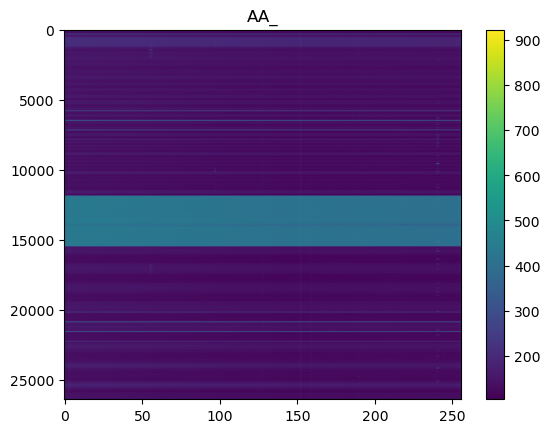

In [ ]:
plt.imshow(Calibrator.get_Tsys_lab(test.spec.AA_*u.V**2, cal_data.gain.AA_).value.real - cal_data.te.AA_, aspect='auto')
plt.colorbar()
plt.title("AA_")
plt.show()

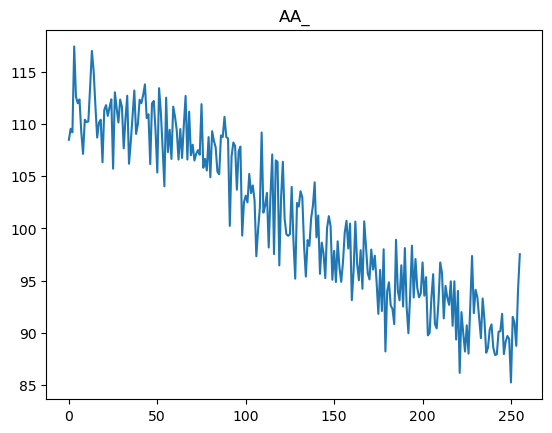

In [ ]:
test_single_spec = test.spec.BB_[15000]
plt.plot(Calibrator.get_Tsys_lab(test_single_spec*u.V**2, cal_data.gain.BB_).value.real - cal_data.te.BB_)
plt.title("AA_")
plt.show()

In [ ]:
const_bw= 20.48*10**6*u.Hz #Hz (bandwidth of the receiver)
const_rbw = const_bw/256 #Hz (resolution bandwidth)
print(const_rbw)

80000.0 Hz
